Importing necessary libraries for EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("ggplot")
import seaborn as sns
import plotly.express as px 
%matplotlib inline

Importing necessary libraries for Language Processing

In [40]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter 

Importing necessary libraries for ML

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# EDA

In [3]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\IMDB Movie Dataset\\IMDB Dataset.csv")

In [4]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe().transpose()

count unique                                                top  \
review     49582  49582  One of the other reviewers has mentioned that ...   
sentiment  49582      2                                           positive   

            freq  
review         1  
sentiment  24884

Static Countplot

Text(0.5, 1.0, 'Sentiment Distribution')

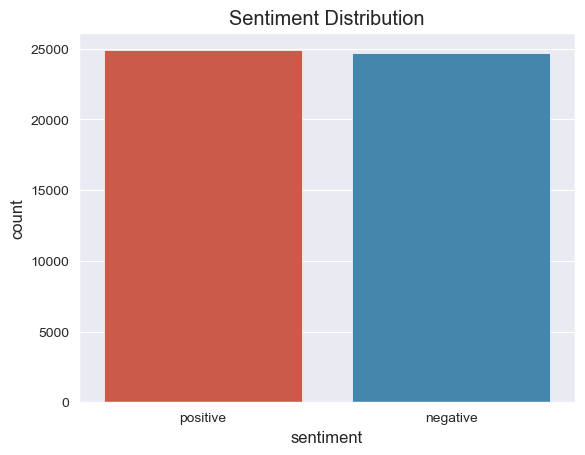

In [8]:
#plt.grid(True)
sns.set_style("darkgrid")
sns.countplot(x = df["sentiment"])
plt.title("Sentiment Distribution")


Dynamic Countplot

In [9]:
fig = px.histogram(df, x="sentiment", color="sentiment", title="Sentiment Distribution")
fig

In [10]:
n = int(input("How many reviews you wanna see?: "))

for i in range(n):
    print(f"Review: {i+1}")
    print(f"Sentiment: {df['sentiment'].iloc[i]} \n")
    print(f"{df['review'].iloc[i]} \n")


How many reviews you wanna see?: 5
Review: 1
Sentiment: positive 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<b

In [11]:
def no_of_words(text):
    words = text.split(" ")
    word_count = len(words)
    return word_count

In [12]:
df["word count"] = df["review"].apply(no_of_words)

In [13]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

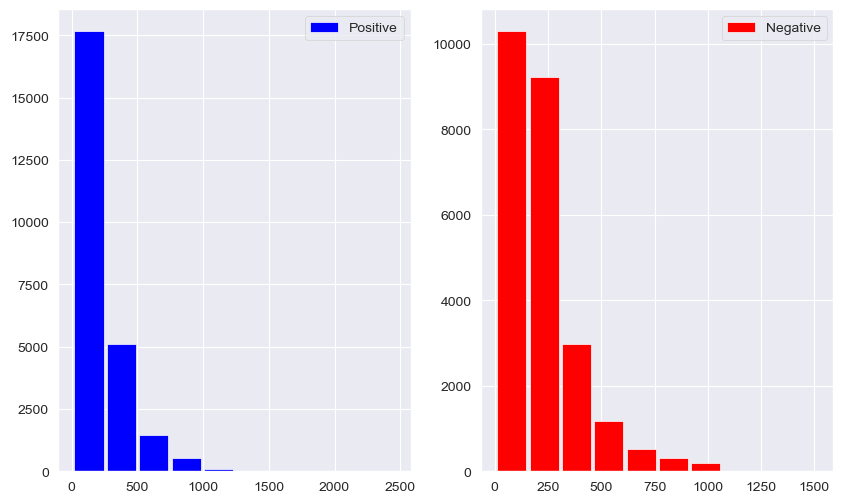

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df["sentiment"] == "positive"]["word count"], label="Positive",color = "blue", rwidth=0.9)
ax[0].legend(loc="upper right")
ax[1].hist(df[df["sentiment"] == "negative"]["word count"], label="Negative",color = "red", rwidth=0.9)
ax[1].legend(loc="upper right")

# Language Processing

In [15]:
stop_words = set(stopwords.words('english'))

def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df["review"] = df["review"].apply(data_processing)

In [17]:
df.head()

review sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...  positive         307
1  wonderful little production filming technique ...  positive         162
2  thought wonderful way spend time hot summer we...  positive         166
3  basically theres family little boy jake thinks...  negative         138
4  petter matteis love time money visually stunni...  positive         230

In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df["review"] = df["review"].apply(lambda x: stemming(x))

In [21]:
df["word count"] = df["review"].apply(no_of_words)

In [22]:
df.head()

review sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...  positive         168
1  wonderful little production filming technique ...  positive          84
2  thought wonderful way spend time hot summer we...  positive          86
3  basically theres family little boy jake thinks...  negative          67
4  petter matteis love time money visually stunni...  positive         125

In [23]:
df["sentiment"] = df["sentiment"].replace({"negative": 0, "positive":1})

Exploring the positive reviews

In [24]:
pos_reviews = df[df["sentiment"] == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

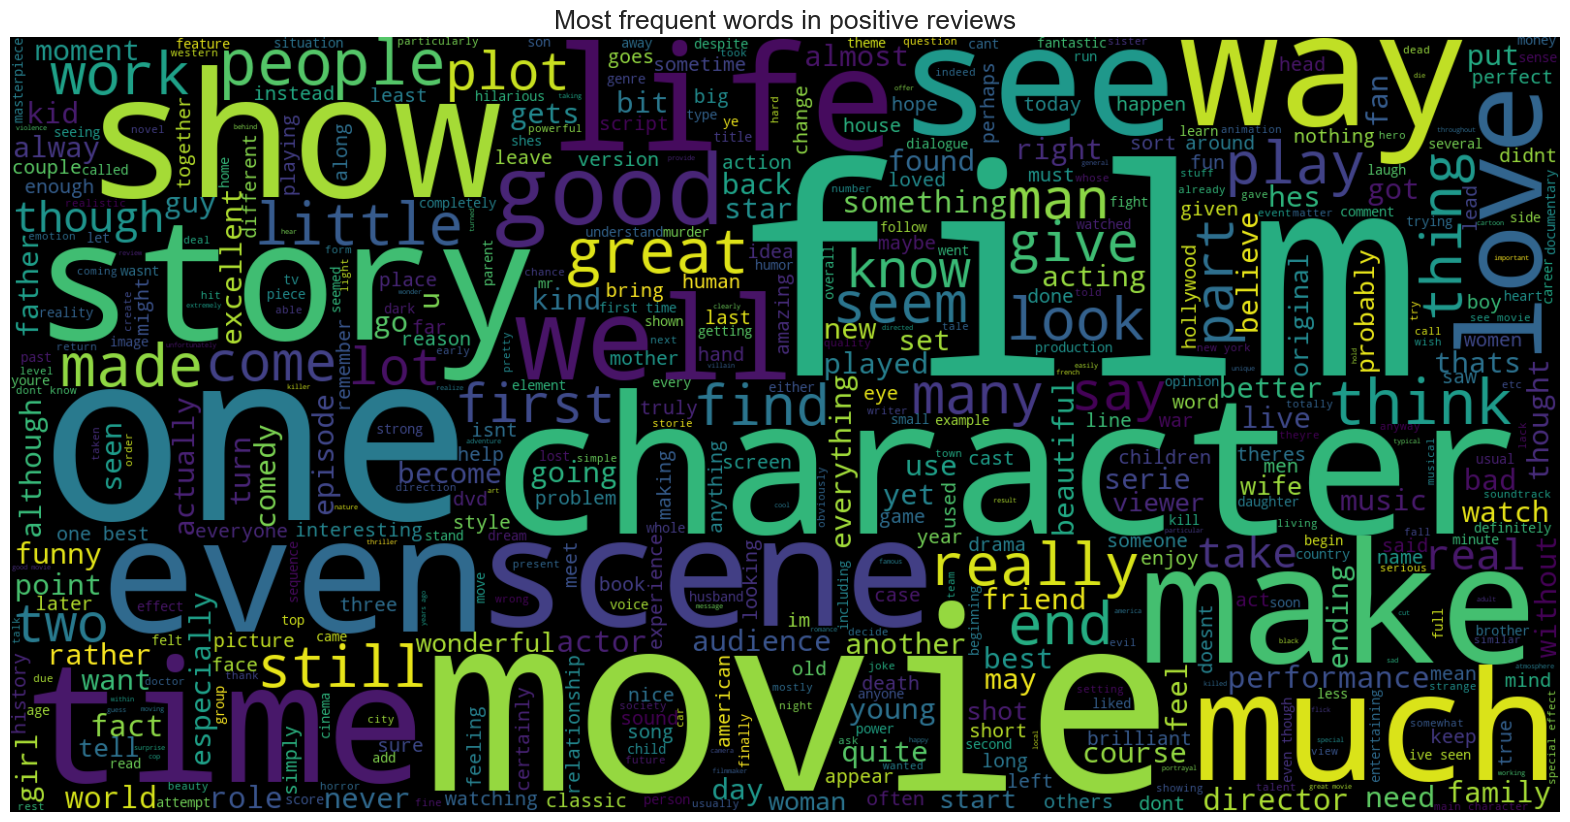

In [36]:
text1 = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [26]:
count1 = Counter()

for text in pos_reviews["review"].values:
    for word in text.split(" "):
        count1[word] += 1
        
count1.most_common(15)

[('film', 39285),
 ('movie', 35836),
 ('one', 25621),
 ('like', 16999),
 ('good', 14286),
 ('great', 12570),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10933),
 ('really', 10641),
 ('also', 10517),
 ('would', 10320),
 ('even', 9319),
 ('much', 8971)]

In [27]:
pos_words = pd.DataFrame(count1.most_common(15))
pos_words.columns = ["word", "count"]
pos_words

word  count
0     film  39285
1    movie  35836
2      one  25621
3     like  16999
4     good  14286
5    great  12570
6    story  12338
7      see  11814
8     time  11724
9     well  10933
10  really  10641
11    also  10517
12   would  10320
13    even   9319
14    much   8971

In [34]:
px.bar(pos_words, x="count", y="word", title="common words in positive review", color="word")

Exploring the negative reviews

In [35]:
neg_reviews = df[df["sentiment"] == 0]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          0          67
7   show amazing fresh innovative idea 70s first a...          0          83
8   encouraged positive comments film looking forw...          0          64
10  phil alien one quirky films humour based aroun...          0          51
11  saw movie 12 came recall scariest scene big bi...          0          84

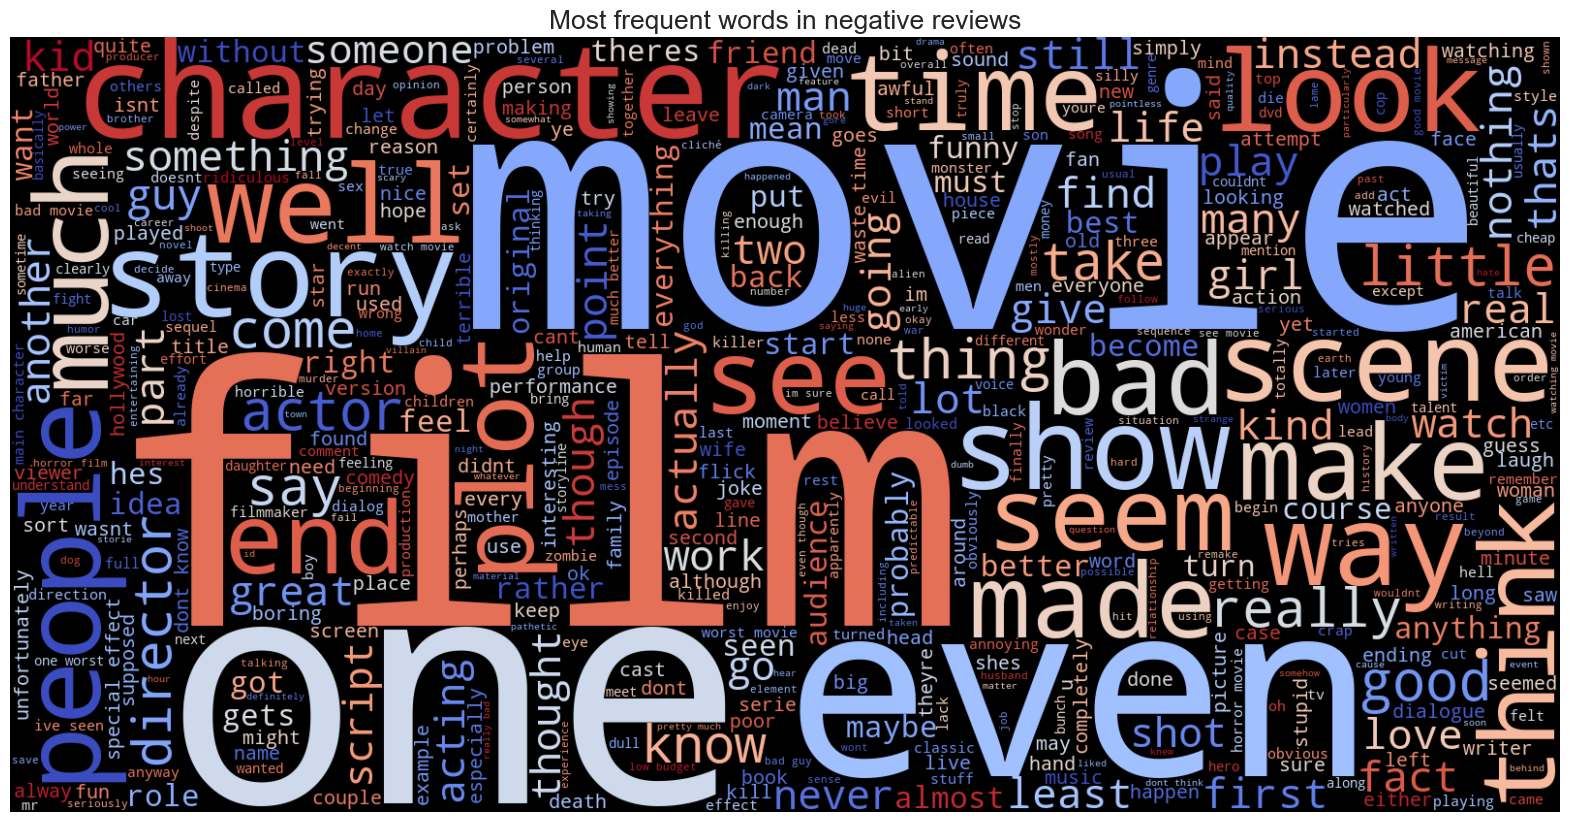

In [39]:
text2 = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap="coolwarm").generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [42]:
count2 = Counter()

for text in neg_reviews["review"].values:
    for word in text.split(" "):
        count2[word] += 1
        
count2.most_common(15)

[('movie', 47011),
 ('film', 34651),
 ('one', 24364),
 ('like', 21509),
 ('even', 14761),
 ('good', 13997),
 ('bad', 13906),
 ('would', 13483),
 ('really', 12084),
 ('time', 11350),
 ('see', 10413),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9759),
 ('story', 9564)]

In [43]:
neg_words = pd.DataFrame(count2.most_common(15))
neg_words.columns = ["word", "count"]
neg_words

word  count
0    movie  47011
1     film  34651
2      one  24364
3     like  21509
4     even  14761
5     good  13997
6      bad  13906
7    would  13483
8   really  12084
9     time  11350
10     see  10413
11    dont   9912
12     get   9884
13    much   9759
14   story   9564

In [45]:
px.bar(neg_words, x="count", y="word", title="common words in negative review", color="word")

Vectorizing the textual data

In [47]:
X = df["review"]
Y = df["sentiment"].values


vect = TfidfVectorizer()
X = vect.fit_transform(df["review"])

# Applying ML Algorithms on the Data

Feature Engineering

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [50]:
print(f"the shape of X_train: {X_train.shape}")
print(f"the shape of X_test: {X_test.shape}")
print(f"the shape of y_train: {y_train.shape}")
print(f"the shape of y_test: {y_test.shape}")

the shape of X_train: (33219, 221707)
the shape of X_test: (16363, 221707)
the shape of y_train: (33219,)
the shape of y_test: (16363,)


Logistic Regression Modeling

In [52]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
LR_predictions = log_reg.predict(X_test)

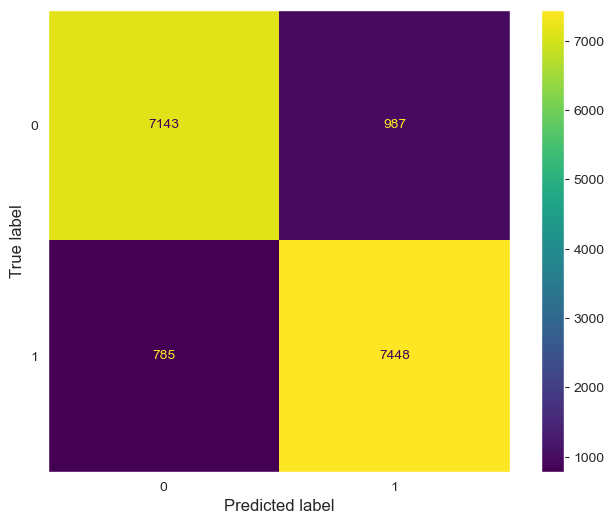

In [66]:
log_reg_conf_mat = confusion_matrix(y_test, LR_predictions, labels=log_reg.classes_)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_conf_mat, display_labels=log_reg.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
conf_disp.plot(ax=ax)
ax.grid(False)

In [64]:
log_reg_class_rep = classification_report(y_test, LR_predictions)
print(log_reg_class_rep)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      8130
           1       0.88      0.90      0.89      8233

    accuracy                           0.89     16363
   macro avg       0.89      0.89      0.89     16363
weighted avg       0.89      0.89      0.89     16363



Multi-nomial Naive Bayes Modeling

In [65]:
MNB = MultinomialNB()

MNB.fit(X_train, y_train)
MNB_predictions = MNB.predict(X_test)

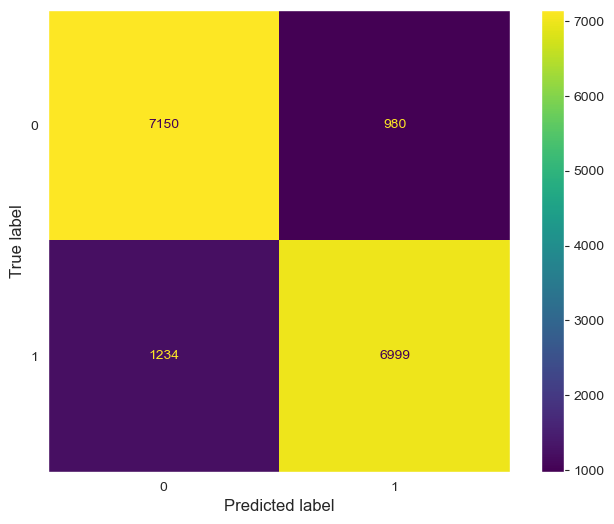

In [69]:
MNB_conf_mat = confusion_matrix(y_test, MNB_predictions, labels=MNB.classes_)
conf_disp2 = ConfusionMatrixDisplay(confusion_matrix=MNB_conf_mat, display_labels=MNB.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
conf_disp2.plot(ax=ax)
ax.grid(False)

In [70]:
MNB_class_rep = classification_report(y_test, MNB_predictions)
print(MNB_class_rep)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      8130
           1       0.88      0.85      0.86      8233

    accuracy                           0.86     16363
   macro avg       0.86      0.86      0.86     16363
weighted avg       0.87      0.86      0.86     16363

